<a href="https://colab.research.google.com/github/fpigato/MECAI/blob/main/C%C3%B3pia_de_CRM_Clustering_phase_3_%5Bv1%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import unicodedata

from sys import platform
from os import path
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from scipy.sparse import csr_matrix
from itertools import cycle, islice

# Phase 1, see [here](https://colab.research.google.com/drive/1oOl1kz7Ul1dvinpV6ha-iO4cWh8-ahOq)

[pt-br]

A primeira etapa foi carregar, limpar e pré-processar os dados. Esta etapa realizou uma análise exploratória, um pré-processamento com limpeza e enriquecimento dos dados e uma engenharia de recursos para tornar os dados adequados para análise conforme a necessidade.

---

[en]

The first step was loading, cleaning and pre-processing the data. This step performed an exploratory analysis, a pre-processing with cleaning and enrichment of the data, and a feature engineering to make the data suitable for analysis as needed.

# Methodology 

[First Notebook](https://colab.research.google.com/drive/1oOl1kz7Ul1dvinpV6ha-iO4cWh8-ahOq)
1. Load e Cleasing
2. Exploratory Data Analysis
3. Data preparation
4. Feature Enginnering

**Second Notebook**
5. **Feature Scaler**
6. **Dimensionality Reduction**
7. **Similarity Clustering**

# Load Datasets

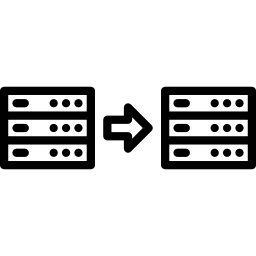

In [ ]:
RANDOM_STATE = 43

executionPlatform = platform
if('linux' in executionPlatform):
    sep = '/'
elif('win' in executionPlatform):
    sep = '\\'

root_path_local_server = ''
root_path_GoogleDrive = f'gdrive{sep}Shared drives{sep}[Data] Assets{sep}Clusterização para CRM{sep}Google Colabs{sep}'

UsingGoogleDriveAPI = True

results_path = f'results{sep}'

if (UsingGoogleDriveAPI):
    from google.colab import drive
    drive.mount('/content/gdrive', force_remount=True)
    root_path = root_path_GoogleDrive
else:
    # Establish connection to local server using root_path
    root_path = root_path_local_server

Mounted at /content/gdrive


## Load files

In [ ]:
df_customers_segmented_file = root_path + results_path + 'df_customer_segmented.csv'

df_customers_segmented = pd.read_csv(df_customers_segmented_file, sep=',')

df_customers_segmented.info()
df_customers_segmented.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93592 entries, 0 to 93591
Columns: 118 entries, customer_unique_id to cluster
dtypes: float64(8), int64(108), object(2)
memory usage: 84.3+ MB


,customer_unique_id,customer_zip_code_prefix,agro_industria_e_comercio,alimentos,alimentos_bebidas,artes,artes_e_artesanato,artigos_de_festas,artigos_de_natal,audio,automotivo,bebes,bebidas,beleza_saude,brinquedos,cama_mesa_banho,casa_conforto,casa_conforto_2,casa_construcao,cds_dvds_musicais,cine_foto,climatizacao,consoles_games,construcao_ferramentas_construcao,construcao_ferramentas_ferramentas,construcao_ferramentas_iluminacao,construcao_ferramentas_jardim,construcao_ferramentas_seguranca,cool_stuff,dvds_blu_ray,eletrodomesticos,eletrodomesticos_2,eletronicos,eletroportateis,esporte_lazer,fashion_bolsas_e_acessorios,fashion_calcados,fashion_esporte,fashion_roupa_feminina,fashion_roupa_infanto_juvenil,...,credit_card,debit_card,voucher,total_baskets,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO,recency,frequency,average_ticket,recency_by_zip_code,frequency_by_zip_code,average_ticket_by_zip_code,avg_freight_by_zip_code,total_baskets_by_zip_code,cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,7787,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,129.90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,111.169560,1,129.90,111.169560,7,72.012857,16.515000,414.19,3.Valuable_Active
1,0000b849f77a49e4a4ce2b2a4ca5be3f,6053,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,18.90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,114.159144,1,18.90,107.699734,9,234.642222,12.688000,2111.78,2.Economical
2,0000f6ccb0745a6a4b88665a16c9f078,66812,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,25.99,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,320.771481,1,25.99,75.871007,7,100.240000,22.742857,701.68,2.Economical
3,0004aac84e0df4da2b147fca70cf8255,18040,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,180.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,287.802025,1,180.00,26.868866,13,150.336923,14.704444,1954.38,4.Valuable_Absent
4,0004bd2a26a76fe21f786e4fbd80607f,5036,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,154.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,145.810660,1,154.00,2.075544,13,222.583077,15.242667,2893.58,3.Valuable_Active


In [ ]:
df_customers_segmented.describe()

,customer_zip_code_prefix,agro_industria_e_comercio,alimentos,alimentos_bebidas,artes,artes_e_artesanato,artigos_de_festas,artigos_de_natal,audio,automotivo,bebes,bebidas,beleza_saude,brinquedos,cama_mesa_banho,casa_conforto,casa_conforto_2,casa_construcao,cds_dvds_musicais,cine_foto,climatizacao,consoles_games,construcao_ferramentas_construcao,construcao_ferramentas_ferramentas,construcao_ferramentas_iluminacao,construcao_ferramentas_jardim,construcao_ferramentas_seguranca,cool_stuff,dvds_blu_ray,eletrodomesticos,eletrodomesticos_2,eletronicos,eletroportateis,esporte_lazer,fashion_bolsas_e_acessorios,fashion_calcados,fashion_esporte,fashion_roupa_feminina,fashion_roupa_infanto_juvenil,fashion_roupa_masculina,...,boleto,credit_card,debit_card,voucher,total_baskets,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO,recency,frequency,average_ticket,recency_by_zip_code,frequency_by_zip_code,average_ticket_by_zip_code,avg_freight_by_zip_code,total_baskets_by_zip_code
count,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,...,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000,93592.000000
mean,35228.649767,0.002628,0.005503,0.002981,0.002212,0.000256,0.000481,0.001624,0.004039,0.045773,0.033251,0.003921,0.104272,0.044715,0.124476,0.005022,0.000331,0.006689,0.000150,0.000759,0.003141,0.012170,0.010022,0.001122,0.003312,0.002554,0.001998,0.041745,0.000716,0.008238,0.002789,0.029992,0.007266,0.093309,0.022491,0.002874,0.000310,0.000481,0.000075,0.001474,...,0.238931,0.907086,0.017672,0.065422,147.596255,0.001004,0.004712,0.001806,0.000887,0.041991,0.016016,0.025868,0.024650,0.025344,0.008740,0.143356,0.008922,0.011529,0.011646,0.006657,0.019532,0.005909,0.062698,0.158913,0.005994,0.003002,0.000491,0.068200,0.045111,0.004124,0.518442,0.003569,237.350947,1.033390,143.916573,55.647380,17.002447,144.439231,20.073490,2404.959605
std,29836.295117,0.109655,0.093613,0.070576,0.050060,0.017902,0.026349,0.051865,0.069223,0.250991,0.209724,0.089253,0.373632,0.236706,0.486791,0.099772,0.022879,0.112846,0.013867,0.031514,0.068494,0.125545,0.135588,0.035939,0.077144,0.063079,0.055533,0.234165,0.034740,0.100996,0.079147,0.205199,0.097245,0.364406,0.182104,0.063571,0.020928,0.029415,0.008648,0.050618,...,0.568473,0.721264,0.152717,0.554153,243.586860,0.041075,0.078513,0.054569,0.037969,0.265011,0.158087,0.193889,0.190379,0.218589,0.112326,0.455351,0.118199,0.154656,0.128496,0.103721,0.171798,0.091976,0.318668,0.508851,0.096284,0.070271,0.025315,0.352355,0.267910,0.079021,0.840651,0.084913,152.543588,0.211149,237.815426,74.964936,17.895929,97.463111,8.691976,2821.323394
min,1003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.850000,0.000000,0.000000,0.000000,0.000000

# *Result Analysis*

Hierarchical clustering 

## Next best actions

**Econômico** - up selling

**Valiosos** - cross selling

**Novos** - activation

**Inativos** - retention / churn reversion

## Customer life cycle

## Product analysis

Analyse product's features


# Clustering Analysis

In [ ]:
df_data_agg = df_customers_segmented\
  .groupby('cluster')\
  .agg(
      num_customers=('customer_unique_id', 'count'),
      avg_spend=('total_baskets', 'mean'),
      avg_recency=('recency', 'mean'),
      avg_frequency=('frequency', 'mean'),
      avg_ticket=('average_ticket', 'mean')
    )\
  .sort_values(by=['cluster'], ascending=[True])

df_data_agg['prop_customers'] = df_data_agg.num_customers / len(df_customers_segmented)

df_data_agg

,num_customers,avg_spend,avg_recency,avg_frequency,avg_ticket,prop_customers
cluster,,,,,,
1.New,18520,148.268522,44.410999,1.039795,143.817131,0.197880
2.Economical,27447,49.151974,218.369041,1.013335,49.005118,0.293262
3.Valuable_Active,13685,244.021087,151.668434,1.062039,236.333041,0.146220
4.Valuable_Absent,13180,251.183822,281.764780,1.051973,244.043752,0.140824
5.Inactive,20760,147.822259,462.853601,1.023507,144.999462,0.221814


# Basket Analysis

In [ ]:
categories = ['moveis_escritorio','moveis_decoracao']

In [ ]:
for category in 

## Valuable and Active clients



In [ ]:
categories = ['moveis_escritorio','moveis_decoracao','automotivo','esporte_lazer',
 'moveis_sala','bebes','utilidades_domesticas','casa_conforto',
 'cama_mesa_banho','brinquedos','casa_conforto_2','cool_stuff',
 'informatica_acessorios','instrumentos_musicais','consoles_games',
 'relogios_presentes','none','beleza_saude','perfumaria','casa_construcao',
 'ferramentas_jardim','eletroportateis','papelaria','climatizacao',
 'telefonia','construcao_ferramentas_construcao','eletronicos','pet_shop',
 'telefonia_fixa','alimentos_bebidas','bebidas','alimentos','market_place',
 'sinalizacao_e_seguranca','fraldas_higiene','audio',
 'fashion_bolsas_e_acessorios','construcao_ferramentas_seguranca',
 'moveis_cozinha_area_de_servico_jantar_e_jardim','fashion_roupa_feminina',
 'malas_acessorios','fashion_calcados','artes','livros_interesse_geral',
 'fashion_roupa_masculina','musica','dvds_blu_ray',
 'construcao_ferramentas_iluminacao','artigos_de_natal',
 'artigos_de_festas','construcao_ferramentas_jardim','eletrodomesticos_2',
 'construcao_ferramentas_ferramentas','agro_industria_e_comercio',
 'pc_gamer','industria_comercio_e_negocios','cine_foto','fashion_esporte',
 'cds_dvds_musicais','eletrodomesticos','seguros_e_servicos',
 'tablets_impressao_imagem','moveis_quarto','portateis_casa_forno_e_cafe',
 'portateis_cozinha_e_preparadores_de_alimentos',
 'fashion_underwear_e_moda_praia','moveis_colchao_e_estofado','pcs',
 'livros_tecnicos','livros_importados','fashion_roupa_infanto_juvenil',
 'artes_e_artesanato','flores','la_cuisine']
 

In [ ]:
clusters = sorted(df_customers['cluster'].unique())

print(clusters)

In [ ]:
#df.loc[df['column_name'] == some_value]
#df_customers.loc[df_customers['cluster'] == '3.Valioso_Presente']

print(df_customers.columns.values)


In [ ]:
buyed_categories = {}
for cluster in clusters:
  current_cluster = df_customers[df_customers['cluster'] == cluster] 
  print("\nCluster: "+cluster)
  for category in categories:
    buyed_categories[category] = current_cluster[category].sum()

  marklist = reversed(sorted(buyed_categories.items(), key=lambda x:x[1]))
  sortdict = dict(marklist)
  print(list(sortdict)[:3])
#buyed_categories.sort_values(ascending = False).head(10)

In [ ]:
print(buyed_categories)